#### 1.	Построение бинарного классификатора SVM с нелинейными ядрами.

In [30]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

A) Для файла Nonlin_ker_1.xslx

In [4]:
df_1 = pd.read_excel('Nonlin_ker_1.xlsx', sheet_name='Лист23')
X_1 = df_1.iloc[:, :2]
y_1 = df_1.iloc[:, 2]

In [5]:
X_train, X_test, y_train, y_test = train_test_split (X_1, y_1, test_size=0.2, random_state=42)

In [6]:
# Преобразование X_train и X_test в массивы NumPy
X_train = X_train.values if isinstance(X_train, pd.Series) else X_train.to_numpy()
X_test = X_test.values if isinstance(X_test, pd.Series) else X_test.to_numpy()

# Преобразование y_train и y_test в массивы NumPy
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train.to_numpy()
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test.to_numpy()

Создаём параметры gamma.

In [7]:
gamma_values = [0.01, 0.1, 0.5, 5, 10]

Эксперимент с gamma для rbf ядра.

In [8]:
for gamma in gamma_values:
    svm_model = SVC(kernel='rbf', gamma=gamma)
    svm_model.fit(X_train, y_train)

    n_support_vectors = np.sum(svm_model.n_support_)
    
    # Оцените модель на обучающей выборке
    y_train_pred = svm_model.predict(X_train)
    
    # Оцените модель на тестовой выборке
    y_test_pred = svm_model.predict(X_test)

    # Вычислите матрицу ошибок (confusion matrix) для обучающей выборки
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

    # Вычислите матрицу ошибок (confusion matrix) для тестовой выборки
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    # Вычислите число неверных классификаций для каждого класса на обучающей и тестовой выборках
    misclassifications_train_class_1 = confusion_matrix_train[0, 1]
    misclassifications_train_class_2 = confusion_matrix_train[1, 0]
    
    misclassifications_test_class_1 = confusion_matrix_test[0, 1]
    misclassifications_test_class_2 = confusion_matrix_test[1, 0]
    
    # Выведите результаты для текущего значения 'gamma'
    print(f"Значение gamma: {gamma}")
    print(f"Число опорных векторов: {n_support_vectors}")
    print(f"Число неверных классификаций для класса +1 (обучающая выборка): {misclassifications_train_class_1}")
    print(f"Число неверных классификаций для класса -1 (обучающая выборка): {misclassifications_train_class_2}")
    print(f"Число неверных классификаций для класса +1 (тестовая выборка): {misclassifications_test_class_1}")
    print(f"Число неверных классификаций для класса -1 (тестовая выборка): {misclassifications_test_class_2}")
    print()

Значение gamma: 0.01
Число опорных векторов: 69
Число неверных классификаций для класса +1 (обучающая выборка): 0
Число неверных классификаций для класса -1 (обучающая выборка): 33
Число неверных классификаций для класса +1 (тестовая выборка): 0
Число неверных классификаций для класса -1 (тестовая выборка): 10

Значение gamma: 0.1
Число опорных векторов: 68
Число неверных классификаций для класса +1 (обучающая выборка): 0
Число неверных классификаций для класса -1 (обучающая выборка): 33
Число неверных классификаций для класса +1 (тестовая выборка): 0
Число неверных классификаций для класса -1 (тестовая выборка): 10

Значение gamma: 0.5
Число опорных векторов: 39
Число неверных классификаций для класса +1 (обучающая выборка): 0
Число неверных классификаций для класса -1 (обучающая выборка): 2
Число неверных классификаций для класса +1 (тестовая выборка): 0
Число неверных классификаций для класса -1 (тестовая выборка): 0

Значение gamma: 5
Число опорных векторов: 65
Число неверных класс

Эксперимент с gamma для poly ядра.

In [9]:
for gamma in gamma_values:
    svm_model = SVC(kernel='poly', gamma=gamma)
    svm_model.fit(X_train, y_train)

    n_support_vectors = np.sum(svm_model.n_support_)
    
    # Оцените модель на обучающей выборке
    y_train_pred = svm_model.predict(X_train)
    
    # Оцените модель на тестовой выборке
    y_test_pred = svm_model.predict(X_test)
    
    # Вычислите матрицу ошибок (confusion matrix) для обучающей выборки
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

    # Вычислите матрицу ошибок (confusion matrix) для тестовой выборки
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    # Вычислите число неверных классификаций для каждого класса на обучающей и тестовой выборках
    misclassifications_train_class_1 = confusion_matrix_train[0, 1]
    misclassifications_train_class_2 = confusion_matrix_train[1, 0]
    
    misclassifications_test_class_1 = confusion_matrix_test[0, 1]
    misclassifications_test_class_2 = confusion_matrix_test[1, 0]
    
    # Выведите результаты для текущего значения 'gamma'
    print(f"Значение gamma: {gamma}")
    print(f"Число опорных векторов: {n_support_vectors}")
    print(f"Число неверных классификаций для класса +1 (обучающая выборка): {misclassifications_train_class_1}")
    print(f"Число неверных классификаций для класса -1 (обучающая выборка): {misclassifications_train_class_2}")
    print(f"Число неверных классификаций для класса +1 (тестовая выборка): {misclassifications_test_class_1}")
    print(f"Число неверных классификаций для класса -1 (тестовая выборка): {misclassifications_test_class_2}")
    print()

Значение gamma: 0.01
Число опорных векторов: 71
Число неверных классификаций для класса +1 (обучающая выборка): 0
Число неверных классификаций для класса -1 (обучающая выборка): 33
Число неверных классификаций для класса +1 (тестовая выборка): 0
Число неверных классификаций для класса -1 (тестовая выборка): 10

Значение gamma: 0.1
Число опорных векторов: 67
Число неверных классификаций для класса +1 (обучающая выборка): 0
Число неверных классификаций для класса -1 (обучающая выборка): 33
Число неверных классификаций для класса +1 (тестовая выборка): 0
Число неверных классификаций для класса -1 (тестовая выборка): 10

Значение gamma: 0.5
Число опорных векторов: 59
Число неверных классификаций для класса +1 (обучающая выборка): 12
Число неверных классификаций для класса -1 (обучающая выборка): 8
Число неверных классификаций для класса +1 (тестовая выборка): 6
Число неверных классификаций для класса -1 (тестовая выборка): 2

Значение gamma: 5
Число опорных векторов: 57
Число неверных клас

Выводы для gamma:
1) Низкое значение gamma:

    -Маленькое значение gamma приводит к тому, что радиальные базисные функции имеют более широкий радиус, что делает поверхность решения более плавной и менее сложной.

    -В этом случае SVM будет создавать более гладкую и простую границу решения.

    -Модель будет более устойчивой к шуму в данных и менее склонной к переобучению.

2) Высокое значение gamma:

    -Большое значение gamma приводит к более узким радиальным базисным функциям, что делает поверхность решения более сложной и "гибкой".

    -В этом случае SVM будет стремиться подстроиться к данным и создавать более сложные границы решения.

    -Модель будет менее устойчивой к шуму и более склонной к переобучению на обучающих данных.

Создаём гиперпараметры C.

In [10]:
C_values = [1, 1000, 0.01]

Эксперимент с C для rbf ядра.

In [11]:
for C in C_values:
    svm_model = SVC(kernel='rbf', C=C)
    svm_model.fit(X_train, y_train)

    n_support_vectors = np.sum(svm_model.n_support_)
    
    # Оцените модель на обучающей выборке
    y_train_pred = svm_model.predict(X_train)
    
    # Оцените модель на тестовой выборке
    y_test_pred = svm_model.predict(X_test)

    # Вычислите матрицу ошибок (confusion matrix) для обучающей выборки
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

    # Вычислите матрицу ошибок (confusion matrix) для тестовой выборки
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    # Вычислите число неверных классификаций для каждого класса на обучающей и тестовой выборках
    misclassifications_train_class_1 = confusion_matrix_train[0, 1]
    misclassifications_train_class_2 = confusion_matrix_train[1, 0]
    
    misclassifications_test_class_1 = confusion_matrix_test[0, 1]
    misclassifications_test_class_2 = confusion_matrix_test[1, 0]
    
    # Выведите результаты для текущего значения 'gamma'
    print(f"Значение С: {C}")
    print(f"Число опорных векторов: {n_support_vectors}")
    print(f"Число неверных классификаций для класса +1 (обучающая выборка): {misclassifications_train_class_1}")
    print(f"Число неверных классификаций для класса -1 (обучающая выборка): {misclassifications_train_class_2}")
    print(f"Число неверных классификаций для класса +1 (тестовая выборка): {misclassifications_test_class_1}")
    print(f"Число неверных классификаций для класса -1 (тестовая выборка): {misclassifications_test_class_2}")
    print()

Значение С: 1
Число опорных векторов: 57
Число неверных классификаций для класса +1 (обучающая выборка): 0
Число неверных классификаций для класса -1 (обучающая выборка): 0
Число неверных классификаций для класса +1 (тестовая выборка): 0
Число неверных классификаций для класса -1 (тестовая выборка): 0

Значение С: 1000
Число опорных векторов: 7
Число неверных классификаций для класса +1 (обучающая выборка): 0
Число неверных классификаций для класса -1 (обучающая выборка): 0
Число неверных классификаций для класса +1 (тестовая выборка): 1
Число неверных классификаций для класса -1 (тестовая выборка): 0

Значение С: 0.01
Число опорных векторов: 68
Число неверных классификаций для класса +1 (обучающая выборка): 0
Число неверных классификаций для класса -1 (обучающая выборка): 33
Число неверных классификаций для класса +1 (тестовая выборка): 0
Число неверных классификаций для класса -1 (тестовая выборка): 10



Эксперимент с C для poly ядра.

In [12]:
for C in C_values:
    svm_model = SVC(kernel='poly', C=C)
    svm_model.fit(X_train, y_train)

    n_support_vectors = np.sum(svm_model.n_support_)
    
    # Оцените модель на обучающей выборке
    y_train_pred = svm_model.predict(X_train)
    
    # Оцените модель на тестовой выборке
    y_test_pred = svm_model.predict(X_test)

    # Вычислите матрицу ошибок (confusion matrix) для обучающей выборки
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

    # Вычислите матрицу ошибок (confusion matrix) для тестовой выборки
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    # Вычислите число неверных классификаций для каждого класса на обучающей и тестовой выборках
    misclassifications_train_class_1 = confusion_matrix_train[0, 1]
    misclassifications_train_class_2 = confusion_matrix_train[1, 0]
    
    misclassifications_test_class_1 = confusion_matrix_test[0, 1]
    misclassifications_test_class_2 = confusion_matrix_test[1, 0]
    
    # Выведите результаты для текущего значения 'gamma'
    print(f"Значение С: {C}")
    print(f"Число опорных векторов: {n_support_vectors}")
    print(f"Число неверных классификаций для класса +1 (обучающая выборка): {misclassifications_train_class_1}")
    print(f"Число неверных классификаций для класса -1 (обучающая выборка): {misclassifications_train_class_2}")
    print(f"Число неверных классификаций для класса +1 (тестовая выборка): {misclassifications_test_class_1}")
    print(f"Число неверных классификаций для класса -1 (тестовая выборка): {misclassifications_test_class_2}")
    print()

Значение С: 1
Число опорных векторов: 67
Число неверных классификаций для класса +1 (обучающая выборка): 16
Число неверных классификаций для класса -1 (обучающая выборка): 6
Число неверных классификаций для класса +1 (тестовая выборка): 7
Число неверных классификаций для класса -1 (тестовая выборка): 1

Значение С: 1000
Число опорных векторов: 57
Число неверных классификаций для класса +1 (обучающая выборка): 14
Число неверных классификаций для класса -1 (обучающая выборка): 8
Число неверных классификаций для класса +1 (тестовая выборка): 6
Число неверных классификаций для класса -1 (тестовая выборка): 2

Значение С: 0.01
Число опорных векторов: 70
Число неверных классификаций для класса +1 (обучающая выборка): 0
Число неверных классификаций для класса -1 (обучающая выборка): 33
Число неверных классификаций для класса +1 (тестовая выборка): 0
Число неверных классификаций для класса -1 (тестовая выборка): 10



Выводы для С:
1) Маленькое C (мягкая граница):

    -Если C близко к нулю, модель будет более толерантной к ошибкам на обучающих данных.

    -Модель будет склонна к созданию более широкой разделяющей границы, допуская некоторые ошибки классификации на обучающих данных.
    
    -Это может привести к более простой модели, которая менее склонна к переобучению.

2) Большое C (жесткая граница):

    -Если C большое, модель будет стремиться к правильной классификации всех точек обучающего набора.

    -Модель будет создавать узкую границу, которая максимизирует зазор между классами.

    -Это может привести к более сложной модели, которая более склонна к переобучению на обучающих данных.

Создаём модель rbf.

In [13]:
# Модель с ядром 'rbf'
rbf_model_1 = SVC(kernel='rbf', gamma='scale', C=10)
rbf_model_1.fit(X_train, y_train)

SVC(C=10)

Вычисляем gamma для rbf.

In [14]:
print("Значение gamma для rbf:", rbf_model_1._gamma)

Значение gamma для rbf: 0.213981965271311


Вычисление значений для rbf.

Самостоятельно написанная модель на основе суммы скалярного произведения опорных векторов (clf.support_vectors_) и тестовых векторов с учетом свободного коэффициента (clf.intercept_). RBF

In [21]:
def rbf_decision_individ(model, X_test):
    # Получение параметров из модели с RBF-ядром
    lmbda = model.dual_coef_[0]  # Дуальные коэффициенты, умноженные на метку класса
    v = model.support_vectors_  # Опорные вектора
    b = model.intercept_  # Коэффициент смещения
    gamma = model._gamma  # Параметр gamma модели RBF-ядра

    # Инициализируем список для хранения меток классов
    predict_test_manually = []
    # Вычисление меток классов для тестовой выборки
    for i in range(len(X_test)):
        a = 0
        for j in range(len(v)):
            a += lmbda[j] * np.exp(-gamma * np.linalg.norm(X_test[i] - v[j]) ** 2)
        predict_test_manually.append(np.sign(a + b))
        k = a+b
        
    predict_test_manually = [int(item[0]) for item in predict_test_manually]
    return predict_test_manually

In [23]:
decision_integrated = rbf_model_1.decision_function(X_test)
precision_rbf_model_1 = precision_score(np.sign(rbf_decision_individ(rbf_model_1, X_test)), np.sign(decision_integrated))
accuracy_rbf_model_1 = accuracy_score(np.sign(rbf_decision_individ(rbf_model_1, X_test)), np.sign(decision_integrated))
print(f"Точность: {precision_rbf_model_1}")
print(f"Доля правильных ответов: {accuracy_rbf_model_1}")

Точность: 1.0
Доля правильных ответов: 1.0


Построение графика для rbf.

In [24]:
support_vectors = rbf_model_1.support_vectors_
y_test_pred = rbf_model_1.predict(X_test)

# Индексы точек, которые были неверно классифицированы
misclassified_indices = np.where(y_test != y_test_pred)[0]

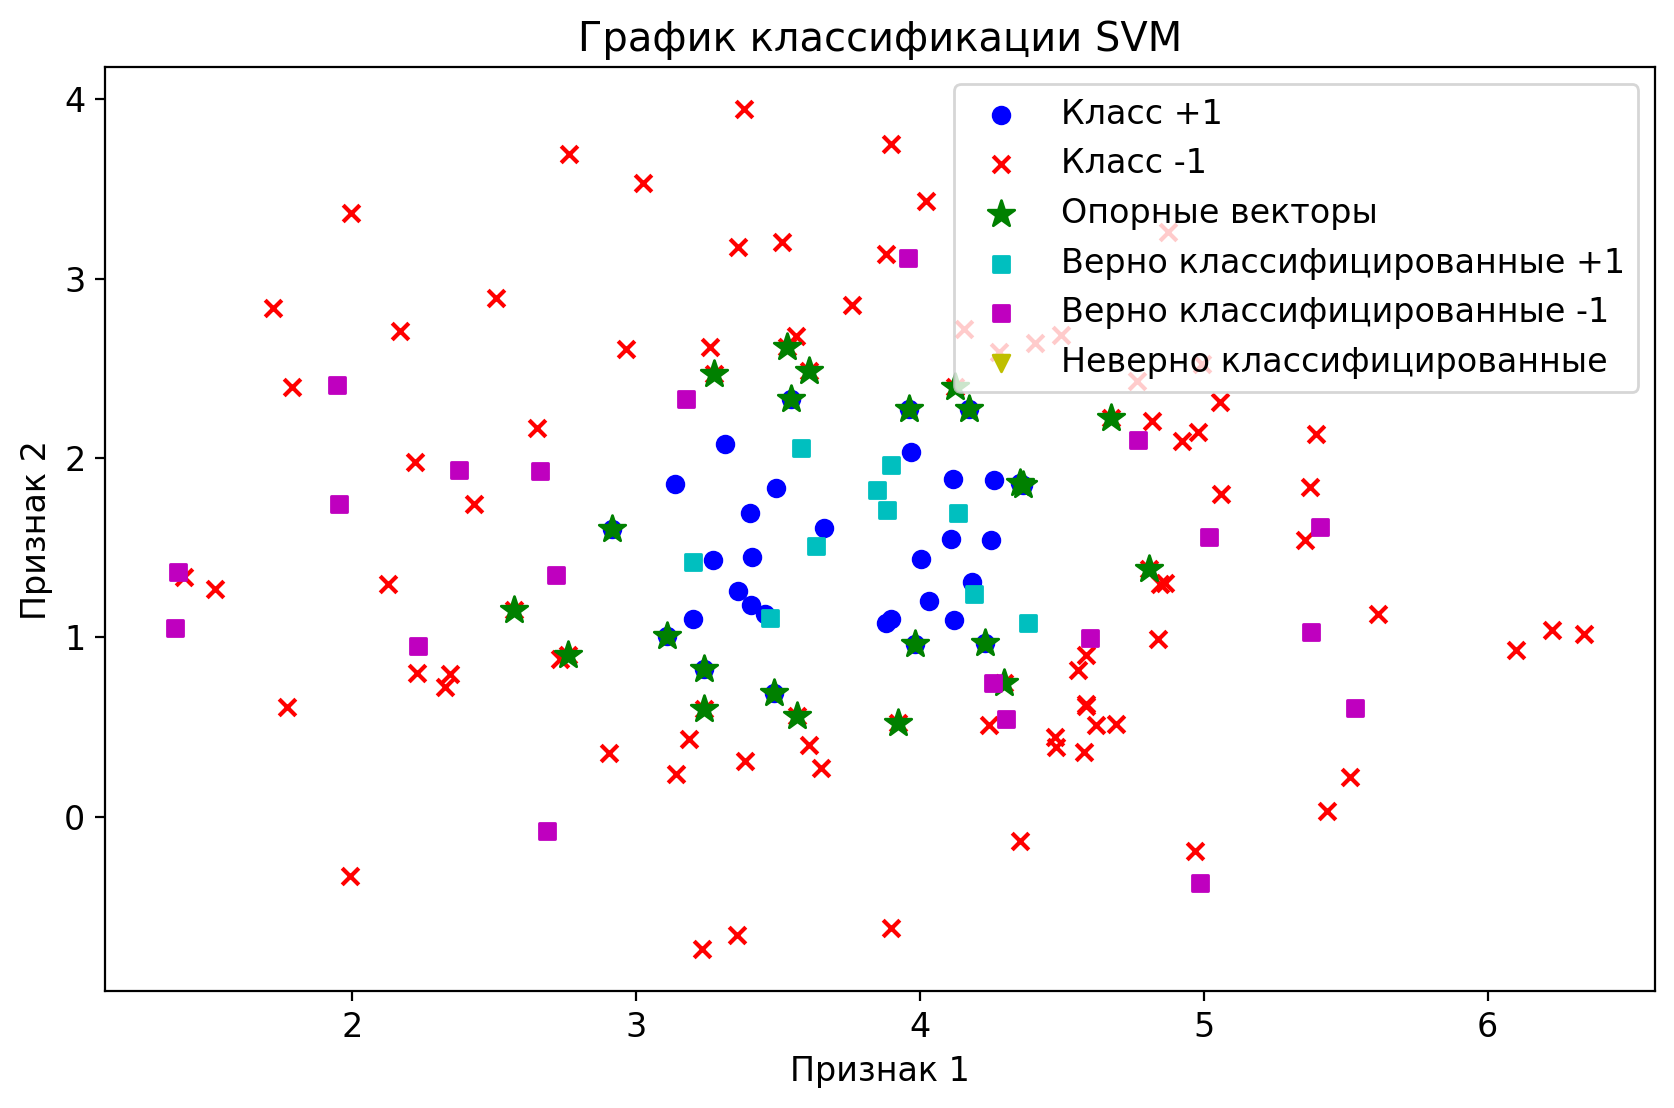

In [25]:
plt.figure(figsize=(10, 6))
# Визуализируйте точки обучающей выборки
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='b', marker='o', label='Класс +1')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], c='r', marker='x', label='Класс -1')

# Визуализируйте опорные векторы
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, c='g', marker='*', label='Опорные векторы')

# Визуализируйте верно и неверно классифицированные точки тестовой выборки
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='c', marker='s', label='Верно классифицированные +1')
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], c='m', marker='s', label='Верно классифицированные -1')
plt.scatter(X_test[misclassified_indices][:, 0], X_test[misclassified_indices][:, 1], c='y', marker='v', label='Неверно классифицированные')

plt.title("График классификации SVM")
plt.legend(loc='upper right')
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

# Отобразите график
plt.show()

Создаём модель c ядром poly.

In [26]:
# Модель с ядром 'poly'
poly_model_1 = SVC(kernel='poly', gamma='scale', C=1.5)
poly_model_1.fit(X_train, y_train)

SVC(C=1.5, kernel='poly')

Вычисление gamma для poly.

In [27]:
print("Значение gamma для poly:", poly_model_1._gamma)

Значение gamma для poly: 0.213981965271311


Вычисление значений для poly.

Самостоятельно написанная модель на основе суммы скалярного произведения опорных векторов (clf.support_vectors_) и тестовых векторов с учетом свободного коэффициента (clf.intercept_). POLY

In [29]:
def poly_decision_individ(model, X_test):
    # Получение параметров из модели с Poly-ядром
    lmbda = model.dual_coef_[0]  # Дуальные коэффициенты, умноженные на метку класса
    v = model.support_vectors_  # Опорные вектора
    b = model.intercept_  # Коэффициент смещения
    degree = model.degree  # Параметр степени ядра Poly

    # Инициализируем список для хранения меток классов
    predict_test_manually = []

    # Вычисление меток классов для тестовой выборки
    for i in range(len(X_test)):
        a = 0
        for j in range(len(v)):
            a += lmbda[j] * (np.dot(X_test[i], v[j]) + 1) ** degree
        predict_test_manually.append(np.sign(a + b))

    predict_test_manually = [int(item[0]) for item in predict_test_manually]
    return predict_test_manually

In [30]:
print(poly_model_1.degree)
decision_integrated = poly_model_1.decision_function(X_test)
precision_poly_model_1 = precision_score(np.sign(poly_decision_individ(poly_model_1, X_test)), np.sign(decision_integrated))
accuracy_poly_model_1 = accuracy_score(np.sign(poly_decision_individ(poly_model_1, X_test)), np.sign(decision_integrated))
print(f"Точность: {precision_poly_model_1}")
print(f"Доля правильных ответов: {accuracy_poly_model_1}")

3
Точность: 1.0
Доля правильных ответов: 0.5333333333333333


Построение графика для poly.

In [31]:
support_vectors = poly_model_1.support_vectors_

y_test_pred = poly_model_1.predict(X_test)

# Индексы точек, которые были неверно классифицированы
misclassified_indices = np.where(y_test != y_test_pred)[0]

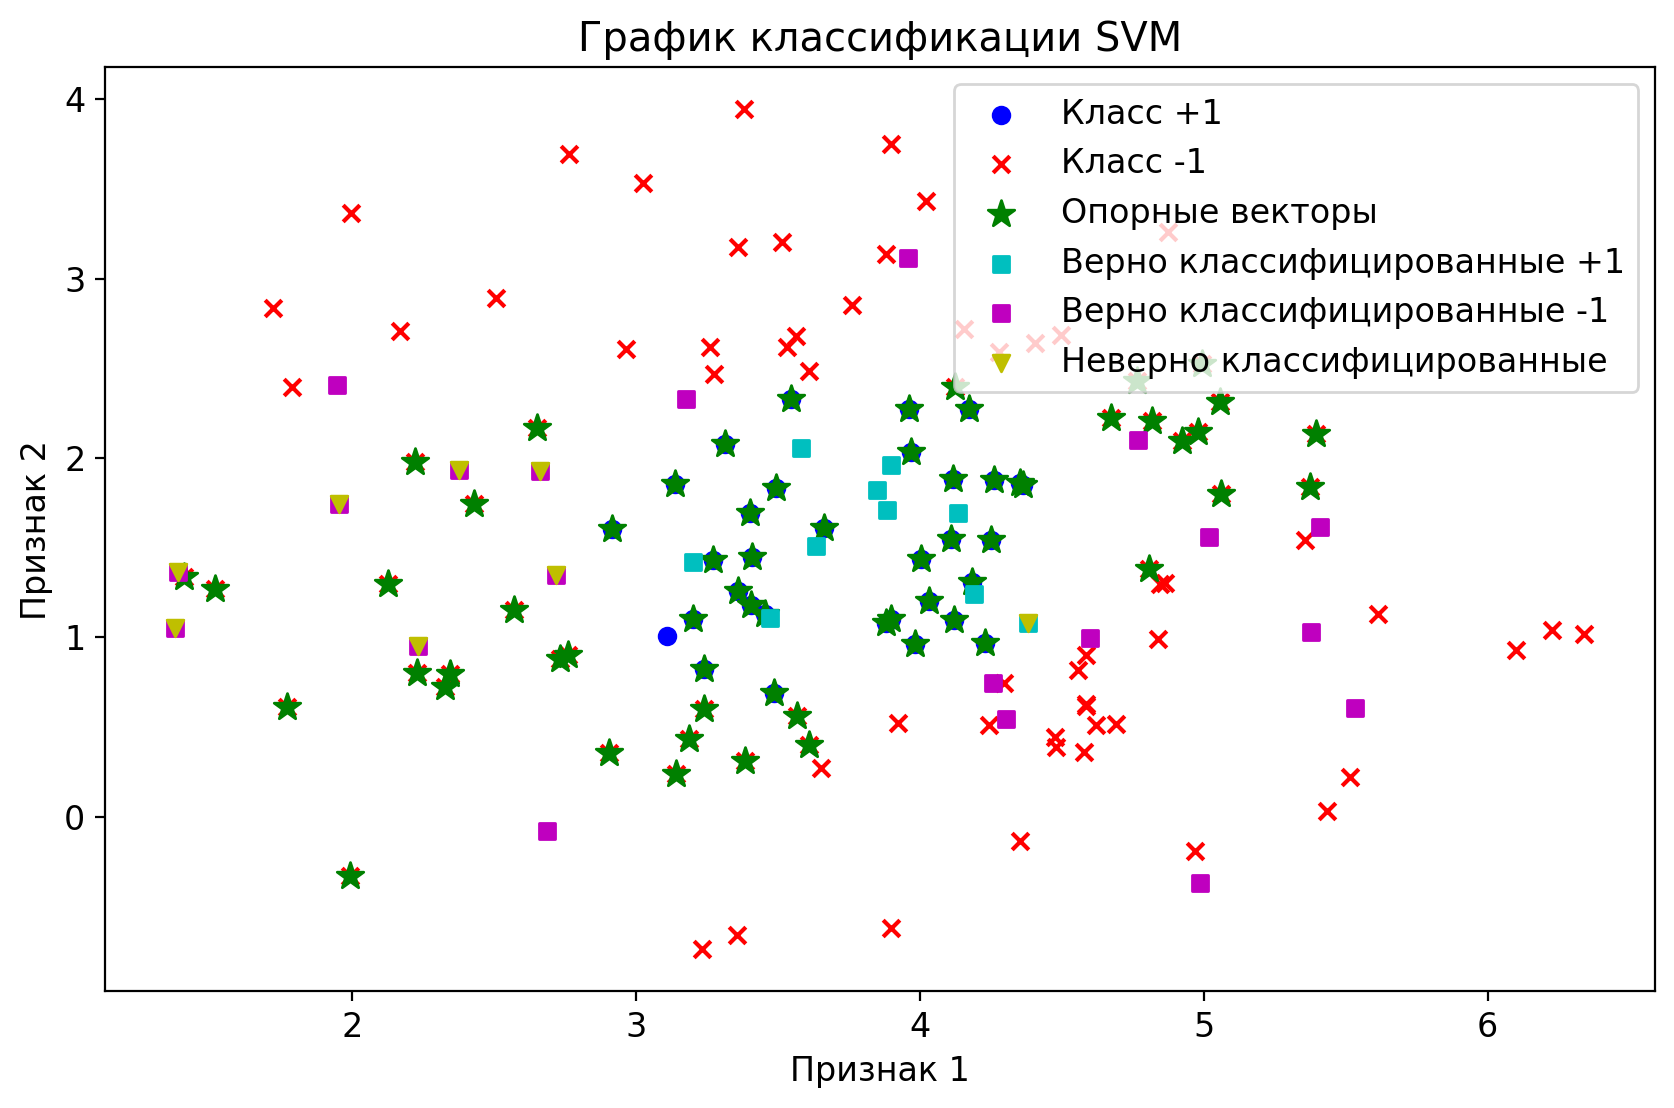

In [32]:
plt.figure(figsize=(10, 6))
# Визуализируйте точки обучающей выборки
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='b', marker='o', label='Класс +1')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], c='r', marker='x', label='Класс -1')

# Визуализируйте опорные векторы
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, c='g', marker='*', label='Опорные векторы')

# Визуализируйте верно и неверно классифицированные точки тестовой выборки
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='c', marker='s', label='Верно классифицированные +1')
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], c='m', marker='s', label='Верно классифицированные -1')
plt.scatter(X_test[misclassified_indices][:, 0], X_test[misclassified_indices][:, 1], c='y', marker='v', label='Неверно классифицированные')

plt.title("График классификации SVM")
plt.legend(loc='upper right')
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

# Отобразите график
plt.show()

Б) Для файла Nonlin_ker_2_2.xslx


In [33]:
df_2 = pd.read_excel('Nonlin_ker_2_2.xlsx', sheet_name='Лист23')
X_2 = df_2.iloc[:, :2]
y_2 = df_2.iloc[:, 2]

In [34]:
X_train, X_test, y_train, y_test = train_test_split (X_2, y_2, test_size=0.2, random_state=42)

In [35]:
# Преобразование X_train и X_test в массивы NumPy
X_train = X_train.values if isinstance(X_train, pd.Series) else X_train.to_numpy()
X_test = X_test.values if isinstance(X_test, pd.Series) else X_test.to_numpy()

# Преобразование y_train и y_test в массивы NumPy
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train.to_numpy()
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test.to_numpy()

Создаём параметр r.

In [40]:
r_values  = [-0.1, 0, 0.1, 5] 

Эксперимент c r для poly ядра.

In [41]:
for r in r_values:
    svm_model = SVC(kernel='poly', coef0=r)
    svm_model.fit(X_train, y_train)

    n_support_vectors = np.sum(svm_model.n_support_)
    
    # Оцените модель на обучающей выборке
    y_train_pred = svm_model.predict(X_train)
    
    # Оцените модель на тестовой выборке
    y_test_pred = svm_model.predict(X_test)

    # Вычислите матрицу ошибок (confusion matrix) для обучающей выборки
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

    # Вычислите матрицу ошибок (confusion matrix) для тестовой выборки
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    # Вычислите число неверных классификаций для каждого класса на обучающей и тестовой выборках
    misclassifications_train_class_1 = confusion_matrix_train[0, 1]
    misclassifications_train_class_2 = confusion_matrix_train[1, 0]
    
    misclassifications_test_class_1 = confusion_matrix_test[0, 1]
    misclassifications_test_class_2 = confusion_matrix_test[1, 0]
    
    # Выведите результаты для текущего значения 'gamma'
    print(f"Значение r: {r}")
    print(f"Число опорных векторов: {n_support_vectors}")
    print(f"Число неверных классификаций для класса +1 (обучающая выборка): {misclassifications_train_class_1}")
    print(f"Число неверных классификаций для класса -1 (обучающая выборка): {misclassifications_train_class_2}")
    print(f"Число неверных классификаций для класса +1 (тестовая выборка): {misclassifications_test_class_1}")
    print(f"Число неверных классификаций для класса -1 (тестовая выборка): {misclassifications_test_class_2}")
    print()

Значение r: -0.1
Число опорных векторов: 57
Число неверных классификаций для класса +1 (обучающая выборка): 17
Число неверных классификаций для класса -1 (обучающая выборка): 4
Число неверных классификаций для класса +1 (тестовая выборка): 6
Число неверных классификаций для класса -1 (тестовая выборка): 1

Значение r: 0
Число опорных векторов: 51
Число неверных классификаций для класса +1 (обучающая выборка): 14
Число неверных классификаций для класса -1 (обучающая выборка): 4
Число неверных классификаций для класса +1 (тестовая выборка): 4
Число неверных классификаций для класса -1 (тестовая выборка): 0

Значение r: 0.1
Число опорных векторов: 48
Число неверных классификаций для класса +1 (обучающая выборка): 13
Число неверных классификаций для класса -1 (обучающая выборка): 4
Число неверных классификаций для класса +1 (тестовая выборка): 4
Число неверных классификаций для класса -1 (тестовая выборка): 0

Значение r: 5
Число опорных векторов: 27
Число неверных классификаций для класса

Выводы для r:
1) r равно 0:

    -Если r установлен в 0, гиперповерхность разделения будет строиться на основе стандартного полинома без свободного члена, что подразумевает, что поверхность будет проходить через начало координат.

    -В этом случае модель будет зависеть только от мономов (x^d), где d - степень полинома.

2) r не равно 0:

    -Значение r отличное от нуля вводит смещение в полиномиальную функцию, делая гиперповерхность более сложной и гибкой.

    -Это может позволить модели лучше аппроксимировать нелинейные зависимости в данных.

Создаём модель с rbf.

In [42]:
# Модель с ядром 'rbf'
rbf_model_2 = SVC(kernel='rbf', gamma='scale', C=0.5)
rbf_model_2.fit(X_train, y_train)

SVC(C=0.5)

Вычисляем gamma для rbf.

In [43]:
print("Значение gamma для rbf:", rbf_model_2._gamma)

Значение gamma для rbf: 0.014147834335287483


Вычисление значения для rbf.

In [44]:
decision_integrated = rbf_model_2.decision_function(X_test)
precision_rbf_model_2 = precision_score(np.sign(rbf_decision_individ(rbf_model_2, X_test)), np.sign(decision_integrated))
accuracy_rbf_model_2 = accuracy_score(np.sign(rbf_decision_individ(rbf_model_2, X_test)), np.sign(decision_integrated))
print(f"Точность: {precision_rbf_model_2}")
print(f"Доля правильных ответов: {accuracy_rbf_model_2}")

Точность: 1.0
Доля правильных ответов: 1.0


Построение графика для rbf.

In [45]:
support_vectors = rbf_model_2.support_vectors_

y_test_pred = rbf_model_2.predict(X_test)

# Индексы точек, которые были неверно классифицированы
misclassified_indices = np.where(y_test != y_test_pred)[0]

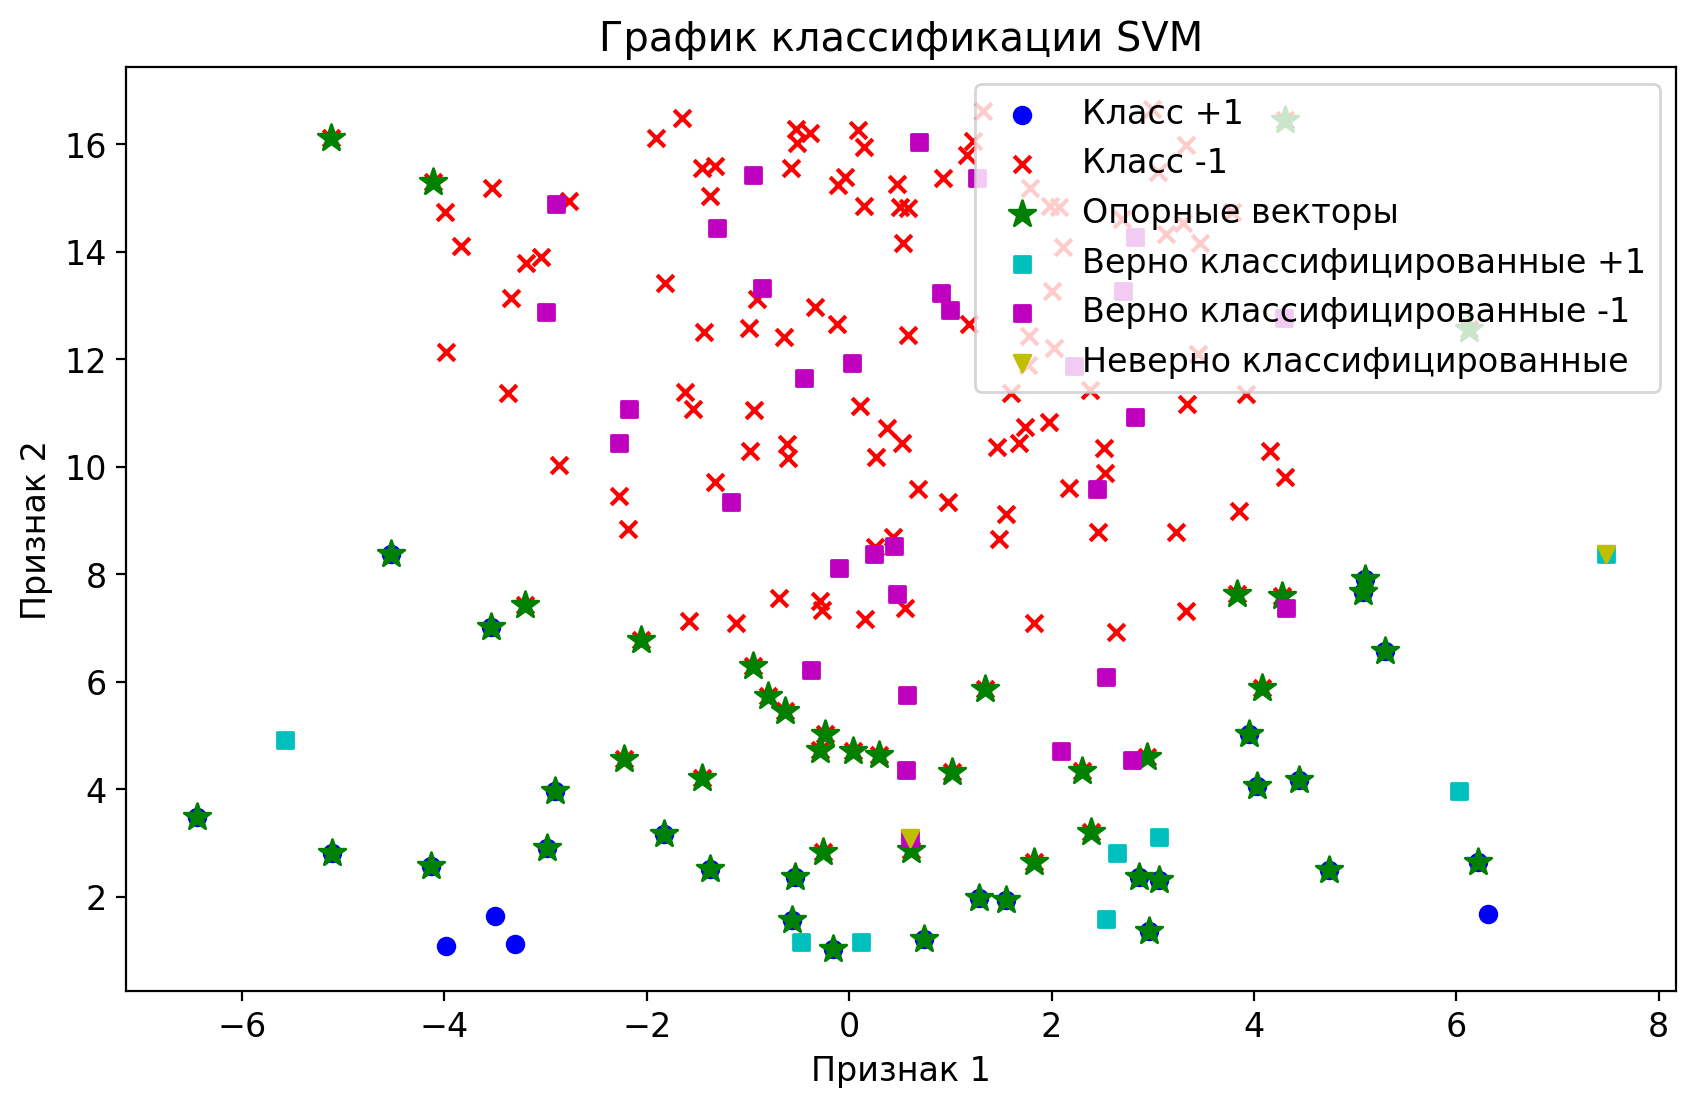

In [46]:
plt.figure(figsize=(10, 6))
# Визуализируйте точки обучающей выборки
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='b', marker='o', label='Класс +1')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], c='r', marker='x', label='Класс -1')

# Визуализируйте опорные векторы
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, c='g', marker='*', label='Опорные векторы')

# Визуализируйте верно и неверно классифицированные точки тестовой выборки
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='c', marker='s', label='Верно классифицированные +1')
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], c='m', marker='s', label='Верно классифицированные -1')
plt.scatter(X_test[misclassified_indices][:, 0], X_test[misclassified_indices][:, 1], c='y', marker='v', label='Неверно классифицированные')

plt.title("График классификации SVM")
plt.legend(loc='upper right')
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

# Отобразите график
plt.show()

Создаём модель с ядром poly.

In [48]:
# Модель с ядром 'poly'
poly_model_2 = SVC(kernel='poly', gamma='scale', coef0=8)
poly_model_2.fit(X_train, y_train)

SVC(coef0=8, kernel='poly')

Вычисляем gamma для poly.

In [49]:
print("Значение gamma для rbf:", poly_model_2._gamma)

Значение gamma для rbf: 0.014147834335287483


Вычисление значений для poly.

In [50]:
decision_integrated = poly_model_2.decision_function(X_test)
precision_poly_model_2 = precision_score(np.sign(poly_decision_individ(poly_model_2, X_test)), np.sign(decision_integrated))
accuracy_poly_model_2 = accuracy_score(np.sign(poly_decision_individ(poly_model_2, X_test)), np.sign(decision_integrated))
print(f"Точность: {precision_poly_model_2}")
print(f"Доля правильных ответов: {accuracy_poly_model_2}")

Точность: 0.875
Доля правильных ответов: 0.975


Построение графика для poly.

In [51]:
support_vectors = poly_model_2.support_vectors_

y_test_pred = poly_model_2.predict(X_test)

# Индексы точек, которые были неверно классифицированы
misclassified_indices = np.where(y_test != y_test_pred)[0]

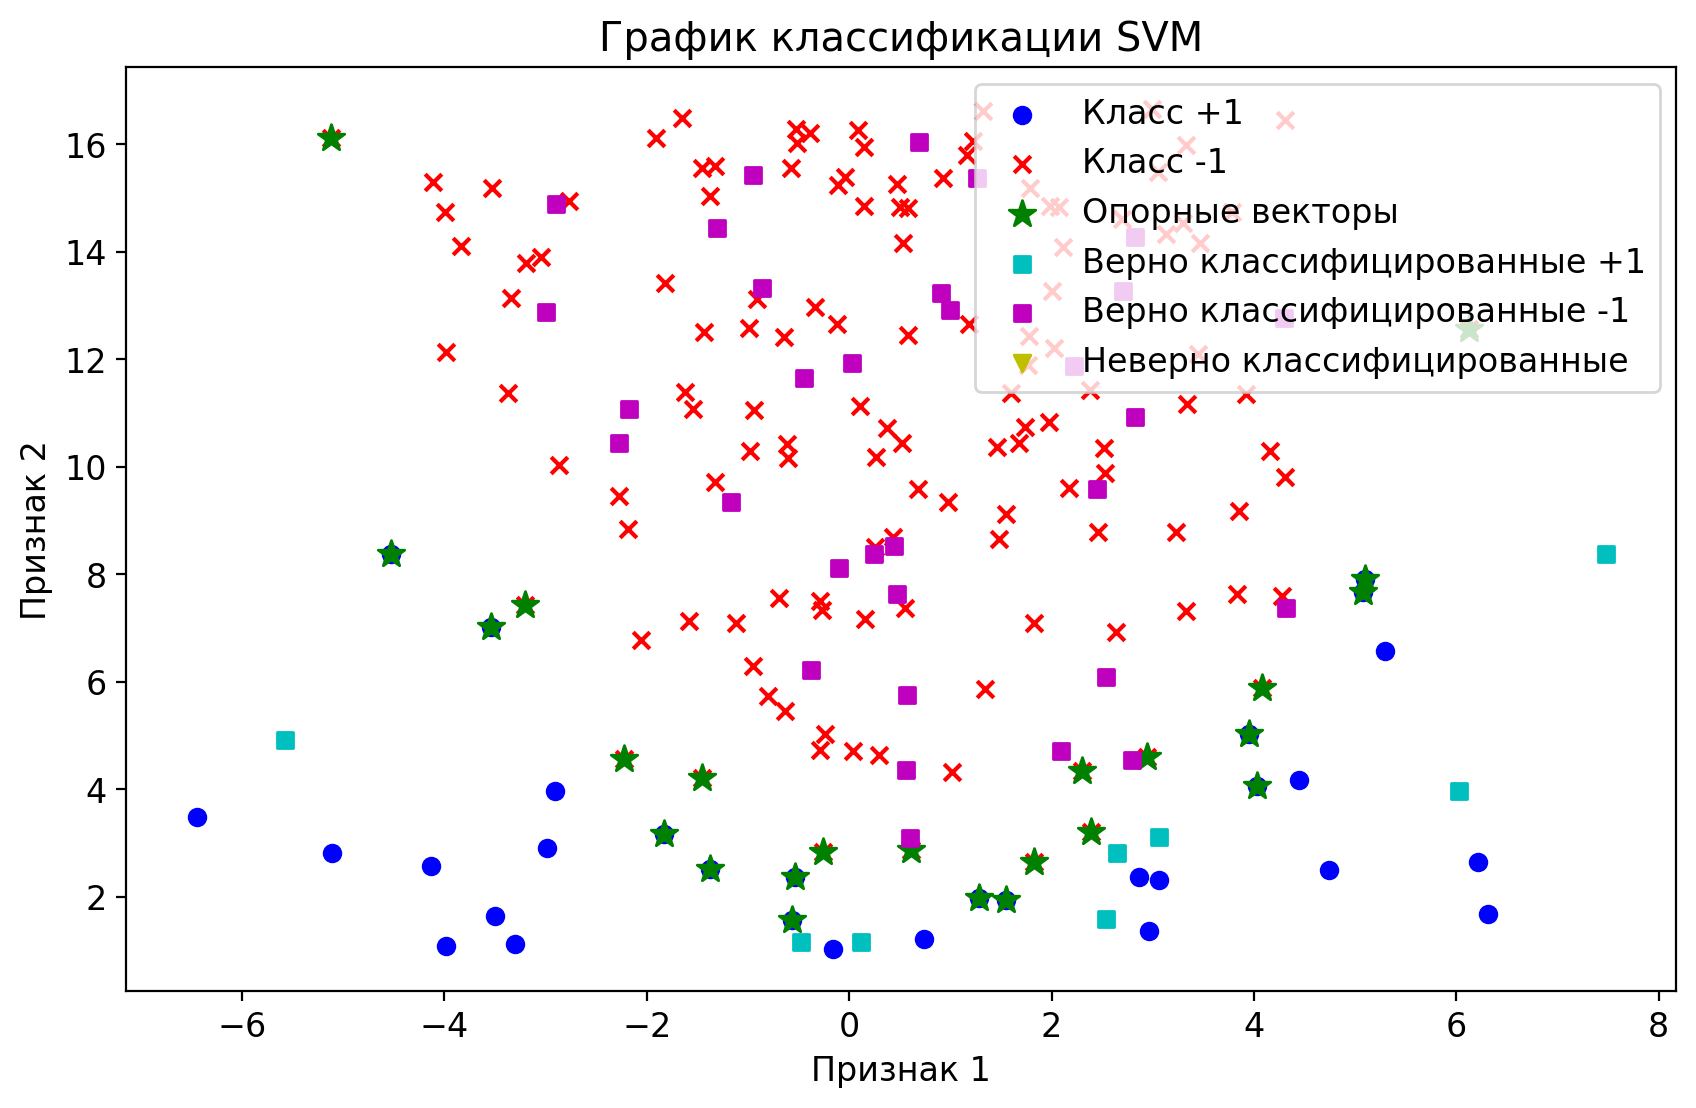

In [53]:
plt.figure(figsize=(10, 6))
# Визуализируйте точки обучающей выборки
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='b', marker='o', label='Класс +1')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], c='r', marker='x', label='Класс -1')

# Визуализируйте опорные векторы
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, c='g', marker='*', label='Опорные векторы')

# Визуализируйте верно и неверно классифицированные точки тестовой выборки
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='c', marker='s', label='Верно классифицированные +1')
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], c='m', marker='s', label='Верно классифицированные -1')
plt.scatter(X_test[misclassified_indices][:, 0], X_test[misclassified_indices][:, 1], c='y', marker='v', label='Неверно классифицированные')

plt.title("График классификации SVM")
plt.legend(loc='upper right')
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

# Отобразите график
plt.show()

#### 2 ЗАДАНИЕ.


Построение многоклассового классификатора SVM.

In [54]:
iris = datasets.load_iris()
scaler = StandardScaler() 
X = scaler.fit_transform(iris.data)
y = iris.target

In [55]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)


Получение 2-ух наименее коррелированных параметров.

In [56]:
# Преобразование данных в DataFrame
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)

correlation_matrix = iris_df.corr()
min_corr = correlation_matrix.abs().unstack().sort_values(ascending=True).drop_duplicates()

feature1, feature2 = min_corr.index[0]
feature1_index = iris.feature_names.index(feature1)
feature2_index = iris.feature_names.index(feature2)
print(feature1, feature2)

sepal length (cm) sepal width (cm)


Создание подвыборки с выбранными признаками

In [57]:
X = scaler.fit_transform(iris.data[:, [feature1_index, feature2_index]])
y = iris.target

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Получение коэффициентов для разделяющих гиперплоскостей для каждого класса для линейного ядра.

In [58]:
svm_model = SVC(kernel='linear', decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

# Получение коэффициентов для разделяющих гиперплоскостей
coef = svm_model.coef_
intercept = svm_model.intercept_

# Вывод коэффициентов для разделяющих гиперплоскостей
class_names = iris.target_names
n_classes = len(class_names)

# Итерируемся по всем парам классов
for i in range(n_classes):
    for j in range(i + 1, n_classes):
        class1 = class_names[i]
        class2 = class_names[j]
        print(f"Class {class1} vs Class {class2}:")
        print(f"Coefficients: {coef[i * (n_classes - 1) // 2 + j - i]}")
        print(f"Intercept: {intercept[i * (n_classes - 1) // 2 + j - i]}\n")

Class setosa vs Class versicolor:
Coefficients: [-1.85253172  0.78008843]
Intercept: -0.7900520408695626

Class setosa vs Class virginica:
Coefficients: [-1.00049066 -0.39496878]
Intercept: 0.4105147848581012

Class versicolor vs Class virginica:
Coefficients: [-1.00049066 -0.39496878]
Intercept: 0.4105147848581012



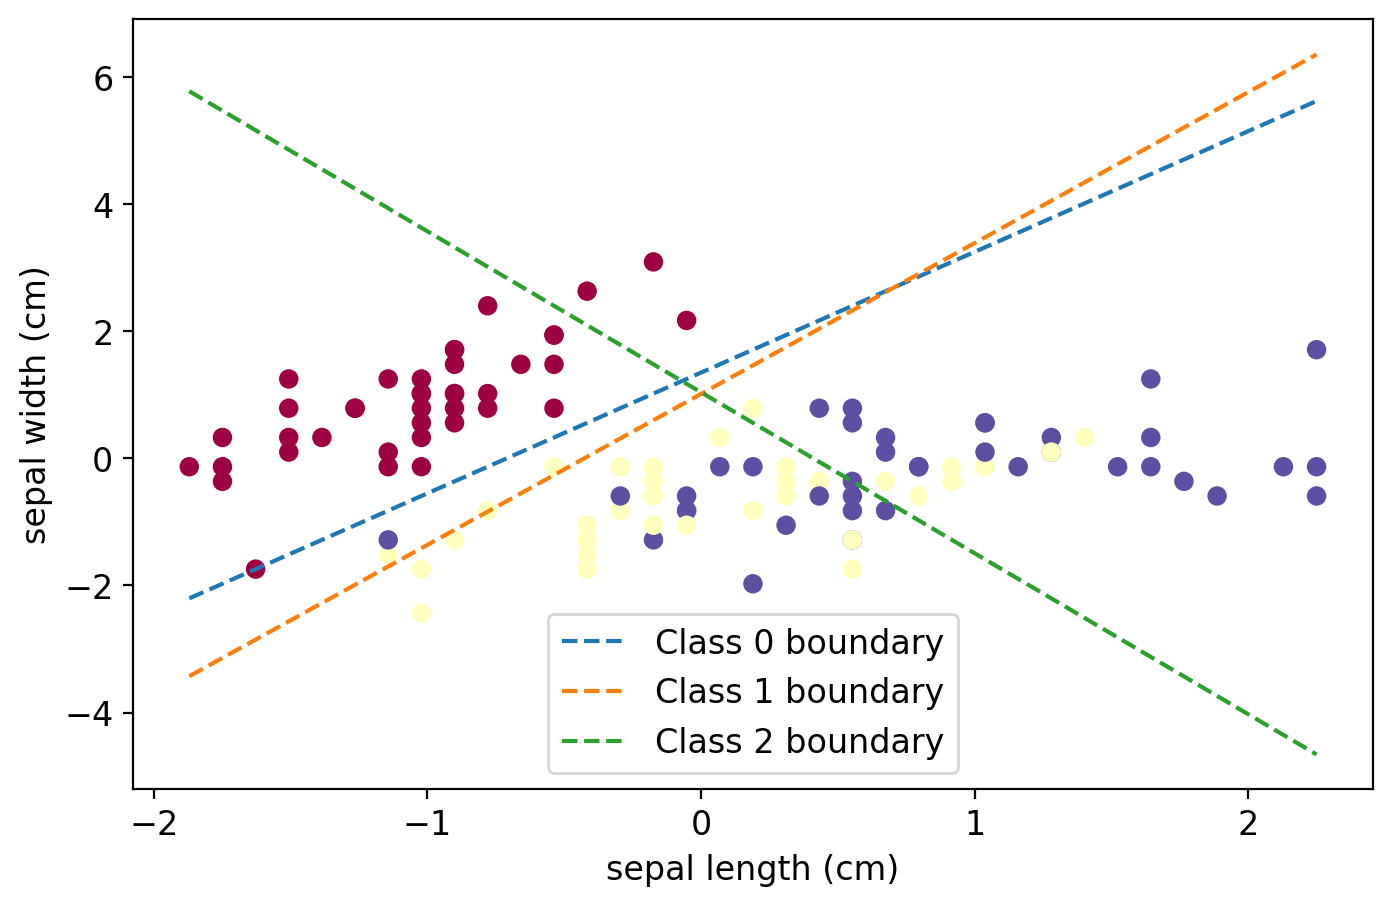

In [59]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.xlabel(feature1)
plt.ylabel(feature2)

for i in range(3):
    a = -coef[i, 0] / coef[i, 1]
    xx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max())
    yy = a * xx - (intercept[i]) / coef[i, 1]
    plt.plot(xx, yy, label=f'Class {i} boundary', linestyle='--')

plt.legend()
plt.show()

Для 6 записей тестовой выборки, относящихся к 3 разным классам, покажите, как будет проведена классификация без использования метода predict 

Решающая функция возвращает расстояние от точки данных до разделяющей гиперплоскости и рассматриваем знак этого расстояния для каждого классификатора.

In [72]:
# Получение решающей функции
decision_function_values = svm_model.decision_function(X_test)
print(decision_function_values)
# Вывод значений решающей функции для каждой записи
for i in range(1, 7):
    print(f"Test Example {i + 1}:")
    for class_idx, class_name in enumerate(iris.target_names):
        print(f"Class {class_name}: {decision_function_values[i, class_idx]}")

    predicted_class = np.argmax(decision_function_values[i])
    actual_class = y_test[i]
    print(f"Predicted Class: {iris.target_names[predicted_class]}, Actual Class: {iris.target_names[actual_class]}\n")

[[-2.74993692 -1.82828817  0.3333335 ]
 [ 0.75000797  0.86531946 -0.09096257]
 [-7.24978625 -5.77891302 -1.42446259]
 [-2.24994794 -1.42424701  0.36364029]
 [-4.49987261 -3.39955944 -0.51525776]
 [ 0.49998775  0.8204261   0.63640154]
 [-1.24998469 -0.52637772  0.84854958]
 [-3.99986893 -3.08530526 -0.90924669]
 [-4.49991672 -3.13019849  0.7576294 ]
 [-2.24996265 -1.33446003  0.78793601]
 [-2.74990752 -2.00786213 -0.51525793]
 [ 0.99993997  1.44893471  1.72744763]
 [ 0.4999951   0.77553261  0.42425369]
 [ 0.99994732  1.40404122  1.51529977]
 [ 2.24995285  2.2121234   0.63640137]
 [-1.99992773 -1.37935365 -0.36372382]
 [-3.24990384 -2.3670098  -0.33341686]
 [-2.24997735 -1.24467305  1.21223173]
 [-1.74997367 -0.93041887  0.81824279]
 [-3.49990936 -2.50169014 -0.03034846]
 [ 1.74992711  2.0325497   1.66683388]
 [-2.24994059 -1.4691405   0.15149243]
 [ 1.499951    1.71829539  1.12131084]
 [-3.49990936 -2.50169014 -0.03034846]
 [-4.74978991 -4.07296167 -2.75796367]
 [-3.74988547 -2.81594445

1) Красный крест ('rx') для неверно классифицированных точек класса 0.
2) Зеленый кружок ('go') для неверно классифицированных точек класса 1.
3) Синий квадрат ('bs') для неверно классифицированных точек класса 2.

Построение графика.

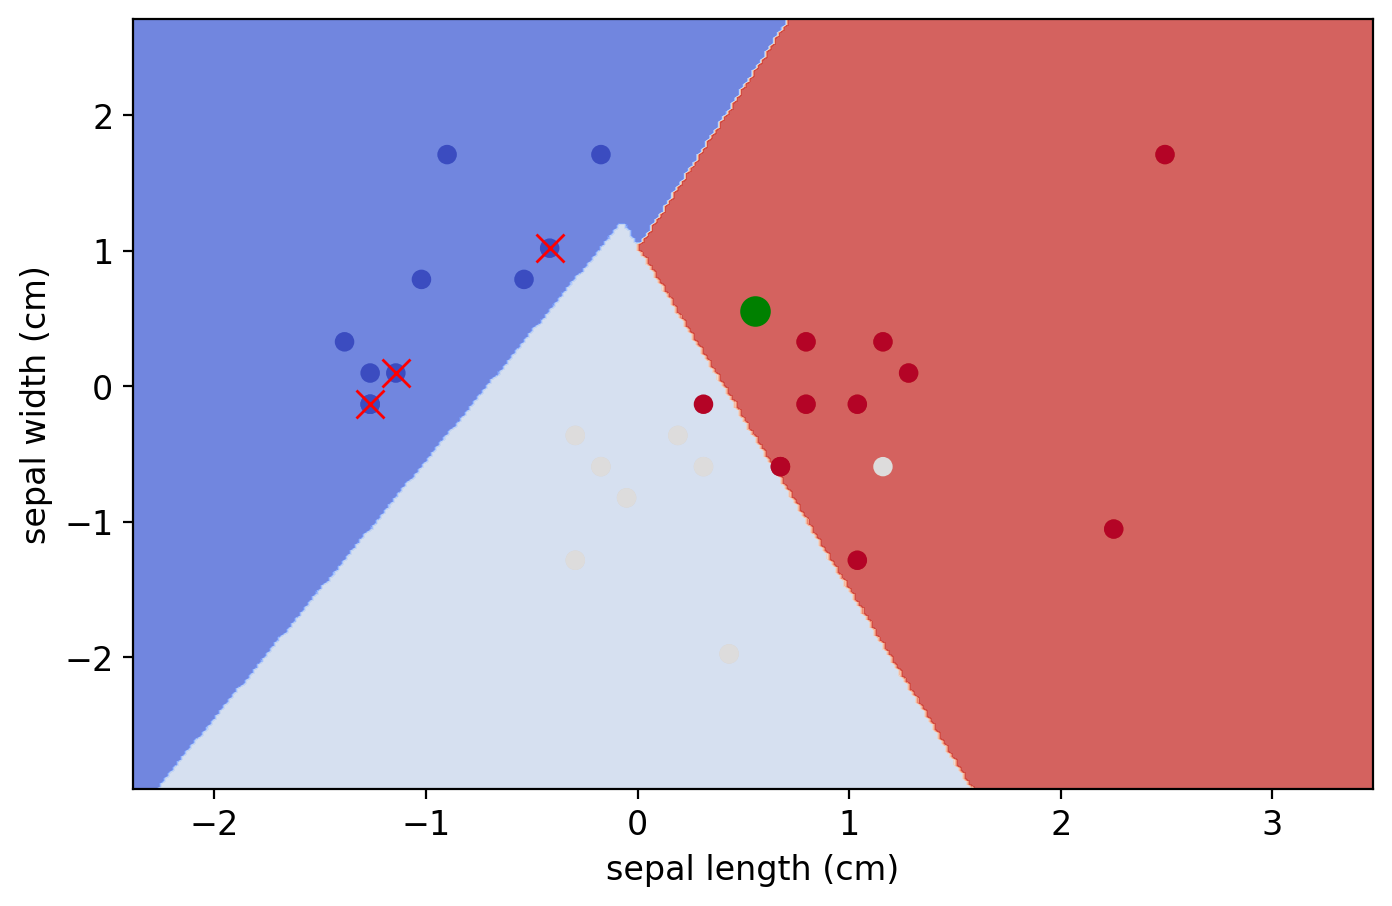

In [73]:
# Создаем словарь для обозначения классов
class_markers = {
    0: 'rx',  # Красный крест
    1: 'go',  # Зеленый кружок
    2: 'bs'   # Синий квадрат
}

h = .02  # Шаг сетки
# Построим график для двух признаков
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
# Преобразование результатов в сетку
Z = Z.reshape(xx.shape)

# Построение контуров решающих гиперплоскостей
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)

# Пройдемся по записям тестовой выборки и отметим неверно классифицированные записи
for i in range(10, 16):
    predicted_class = np.argmax(decision_function_values[i])
    actual_class = y_test[i]

    if predicted_class != actual_class:
        plt.plot(X_test[i, 0], X_test[i, 1], class_markers[actual_class], markersize=10)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

Отмечаем неверно классифицированные точки для тестовой выборки (для классификации всей тестовой выборки используем метод predict).

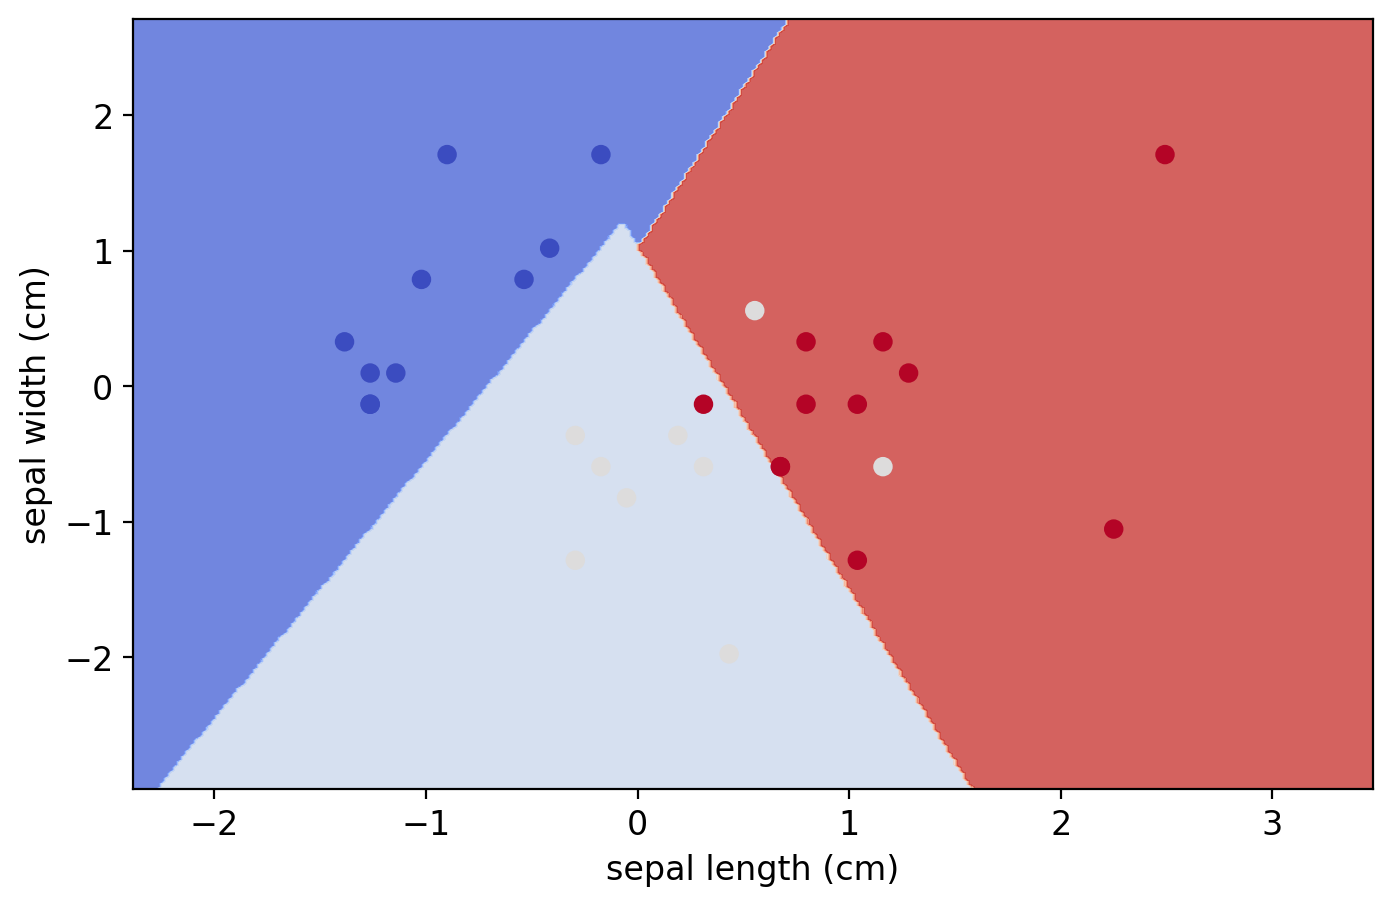

In [74]:
# Визуализация гиперплоскостей
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Преобразование результатов в сетку
Z = Z.reshape(xx.shape)

# Построение контуров решающих гиперплоскостей
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

#### 3. Выбросы CO и NO.

А) Разметка данных.

In [25]:
df = pd.read_csv('gt_2015.csv')
df['Class'] = df['CO'].apply(lambda x: 1 if x >= 4.5 else -1)

df.to_csv('updated_gt_2015.csv', index=False)

Б) Обучение.

Функция для построения ROC-кривой.

In [26]:
def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Построение ROC-кривой
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

Построение моделей с разными ядрами.

In [27]:
df = pd.read_csv('updated_gt_2015.csv')

# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['CO', 'NOX']]
y = df['Class']
k = 0 
for i in range(len(y)):
    if y[i] == 1:
        k += 1
print(k)
print(len(y) - k) 

1168
6216


Train:
-1.7261364919853457e-16 1.0
Test:
0.03800455831589643 1.0571727607681738


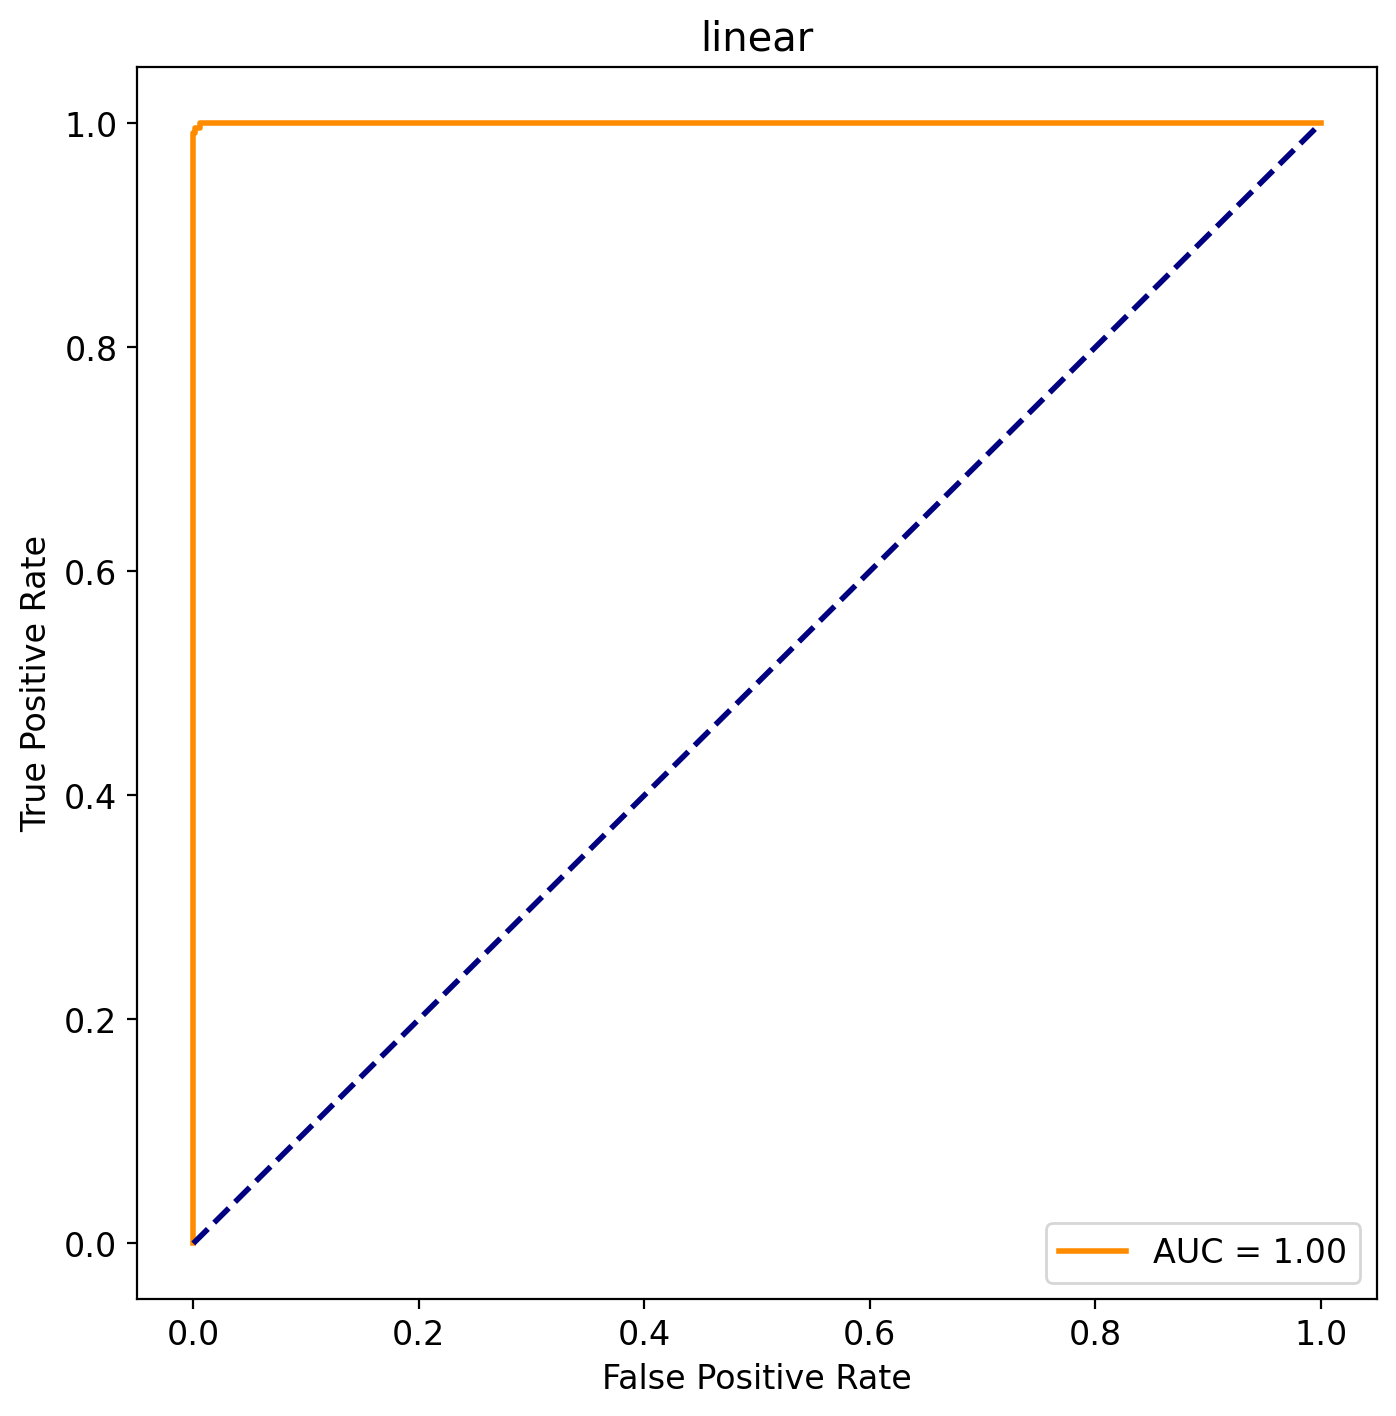

Kernel: linear
Accuracy: 0.9980
Precision: 0.9959
Recall: 0.9918
Confusion matrix:
 [[1232    1]
 [   2  242]]


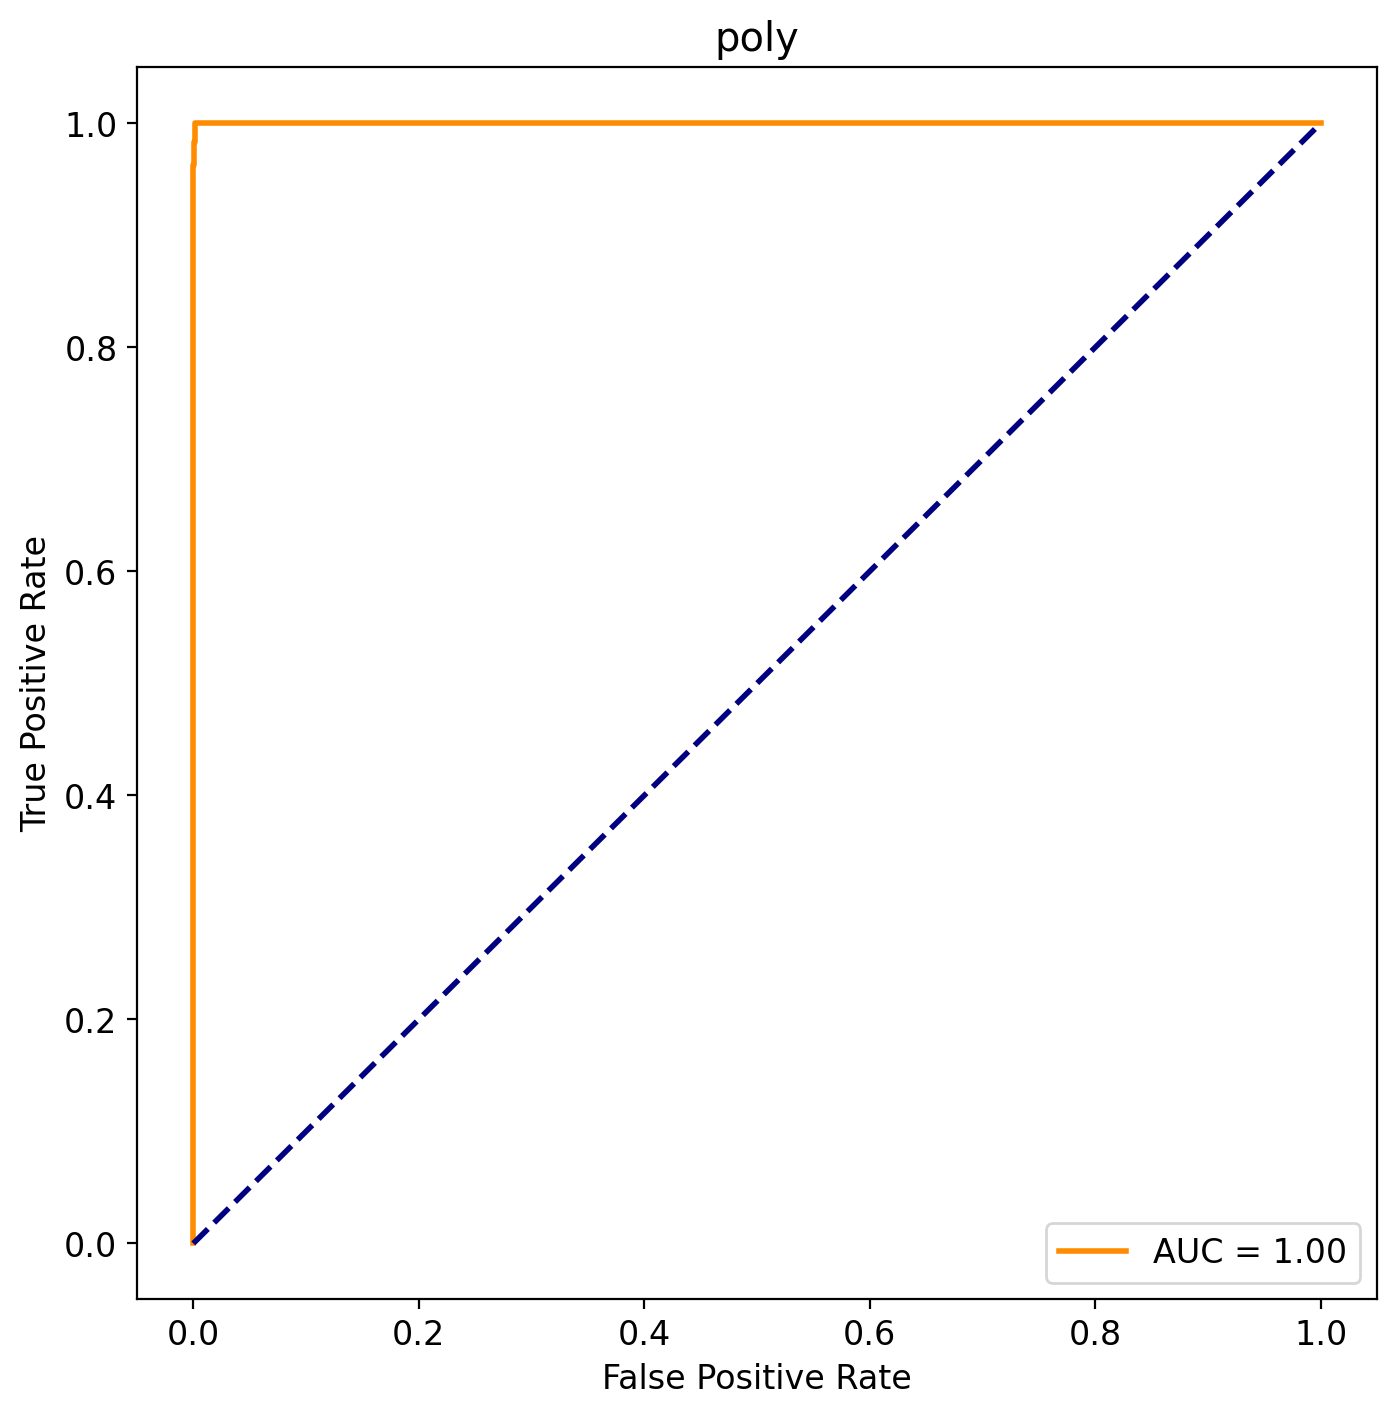

Kernel: poly
Accuracy: 0.9966
Precision: 0.9959
Recall: 0.9836
Confusion matrix:
 [[1232    1]
 [   4  240]]


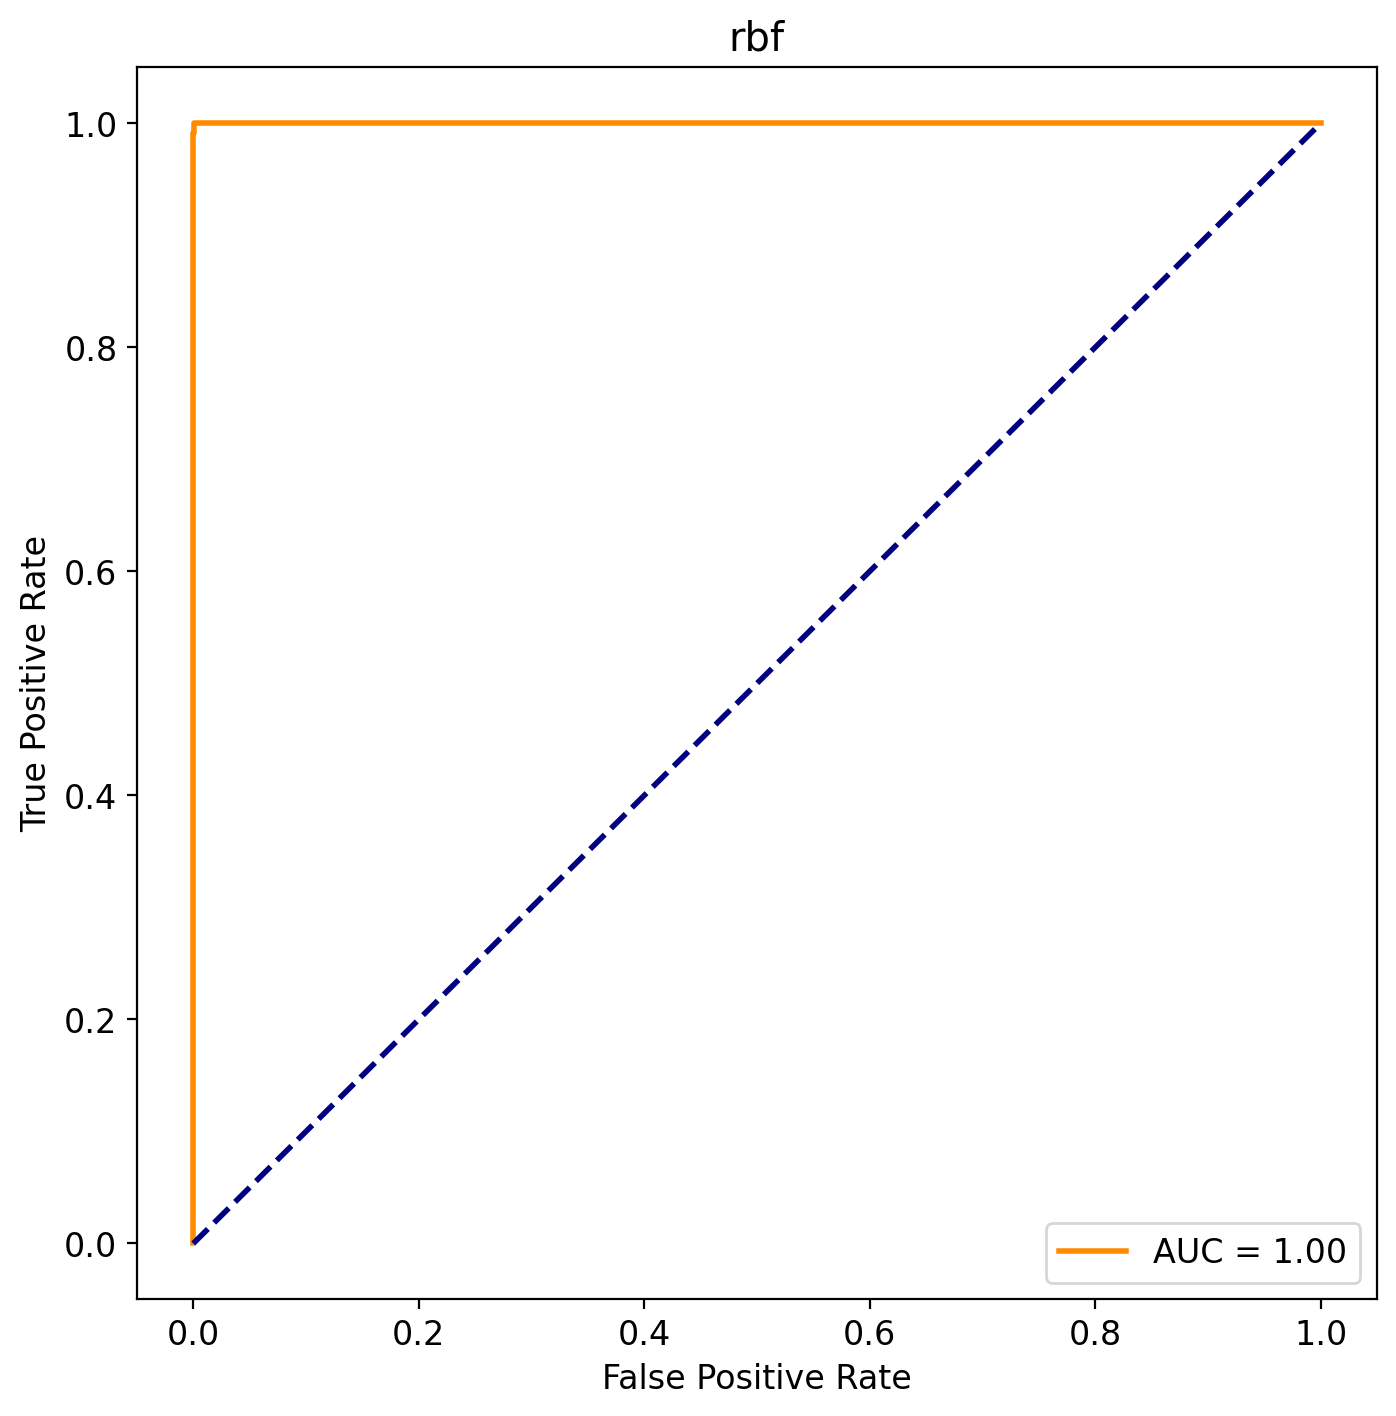

Kernel: rbf
Accuracy: 0.9993
Precision: 0.9959
Recall: 1.0000
Confusion matrix:
 [[1232    1]
 [   0  244]]


In [38]:
df = pd.read_csv('updated_gt_2015.csv')

# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['CO', 'NOX']]
y = df['Class'] 

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Train:")
print(np.mean(X_train_scaled), np.var(X_train_scaled))
print("Test:")
print(np.mean(X_test_scaled), np.var(X_test_scaled))

# Обучение модели с различными ядрами
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    # Создание SVM модели
    svm_model = SVC(kernel=kernel, C=10, gamma='scale', random_state=42)

    # Обучение модели
    svm_model.fit(X_train_scaled, y_train)

    # Предсказание на тестовом наборе
    y_pred = svm_model.predict(X_test_scaled)

    # Оценка модели
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    # Предсказание вероятностей положительного класса
    y_scores = svm_model.decision_function(X_test_scaled)
    
    # Построение ROC-кривой и вычисление AUC-ROC
    plot_roc_curve(y_test, y_scores, kernel)

    # Вывод результатов
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion matrix:\n {matrix}")